In [ ]:
!pip install kagglehub matplotlib seaborn pandas

import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [15]:
path = kagglehub.dataset_download("mohamedramadan2040/education-in-danger-incident-data-2020-to2025")
xlsx_path = os.path.join(path, "2020-2025-education-in-danger-incident-data.xlsx")

df = pd.read_excel(xlsx_path)

# Display basic information about the dataset
print("--- Dataset Information ---")
df.info()

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Descriptive Statistics ---")
print(df.describe(include='all'))

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Unique Values in Key Columns (example) ---")
# Replace 'Country' and 'Incident Type' with actual key columns from your dataset
if 'Country' in df.columns:
    print(f"\nUnique Countries: {df['Country'].nunique()}")
    print(df['Country'].value_counts().head()) # Top 5 countries
if 'Incident Type' in df.columns:
    print(f"\nUnique Incident Types: {df['Incident Type'].nunique()}")
    print(df['Incident Type'].value_counts().head()) # Top 5 incident types
# Add more columns of interest


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4607 entries, 0 to 4606
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Date                                           4607 non-null   datetime64[ns]
 1   Event Description                              0 non-null      float64       
 2   Country                                        4607 non-null   object        
 3   Country ISO                                    4607 non-null   object        
 4   Admin 1                                        4603 non-null   object        
 5   Latitude                                       3981 non-null   float64       
 6   Longitude                                      3981 non-null   float64       
 7   Geo Precision                                  4606 non-null   object        
 8   Location of event             

In [18]:
# Continuando do seu código original...

# --- 1. Tratamento e Limpeza dos Dados ---

# Copiando o DataFrame para manter o original intacto
df_clean = df.copy()

# 1.1. Remover colunas desnecessárias ou com muitos valores ausentes
cols_to_drop = [
    'Event Description',
    'Known Educators Kidnap Or Arrest Outcome',
    'Known Student Kidnap Or Arrest Outcome',
    'SiND Event ID'
]
df_clean.drop(columns=cols_to_drop, inplace=True)

# 1.2. Preencher valores nulos em colunas com poucos dados faltantes
df_clean['Admin 1'].fillna('Desconhecido', inplace=True)
df_clean['Location of event'].fillna('Desconhecido', inplace=True)

# Nota: Latitude e Longitude não serão preenchidas para não gerar dados falsos.
# Análises geográficas simplesmente ignorarão as linhas onde elas são nulas.

# 1.3. Engenharia de Features (criação de novas colunas)
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month

# Criar coluna de vítimas totais
victim_cols = [
    'Educators Killed', 'Educators Injured', 'Educators Kidnapped',
    'Students Killed', 'Students Injured', 'Students Kidnapped'
]
df_clean['Total Victims'] = df_clean[victim_cols].sum(axis=1)

print("--- Informações do Dataset Limpo ---")
df_clean.info()

print("\n--- Primeiras 5 Linhas do Dataset Limpo ---")
print(df_clean.head())

--- Informações do Dataset Limpo ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4607 entries, 0 to 4606
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Date                                           4607 non-null   datetime64[ns]
 1   Country                                        4607 non-null   object        
 2   Country ISO                                    4607 non-null   object        
 3   Admin 1                                        4607 non-null   object        
 4   Latitude                                       3981 non-null   float64       
 5   Longitude                                      3981 non-null   float64       
 6   Geo Precision                                  4606 non-null   object        
 7   Location of event                              4607 non-null   object        
 8   Reported Perpetrator 

/tmp/ipython-input-18-2041884838.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Admin 1'].fillna('Desconhecido', inplace=True)
/tmp/ipython-input-18-2041884838.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

/tmp/ipython-input-20-4254557069.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis', orient='h')


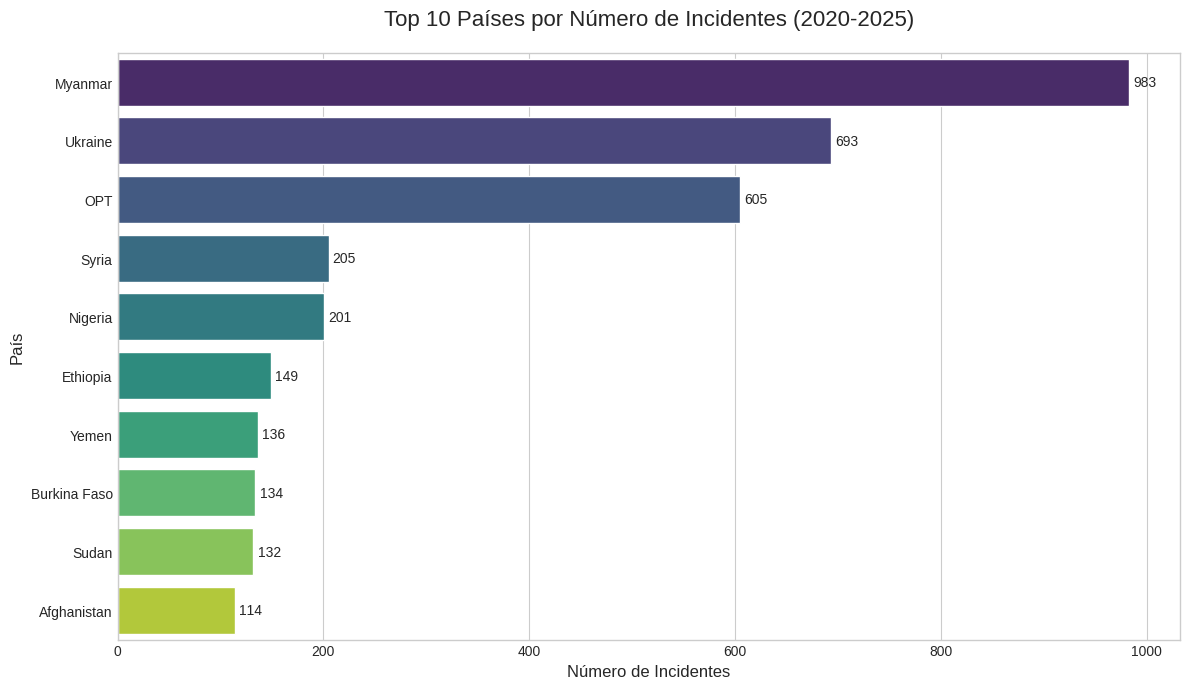

In [20]:
plt.style.use('seaborn-v0_8-whitegrid')

# Configurar o tamanho da figura
plt.figure(figsize=(12, 7))

# Contar os incidentes por país e pegar os 10 maiores
top_10_countries = df_clean['Country'].value_counts().head(10)

# Criar o gráfico de barras
ax = sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis', orient='h')

# Adicionar títulos e rótulos
ax.set_title('Top 10 Países por Número de Incidentes (2020-2025)', fontsize=16, pad=20)
ax.set_xlabel('Número de Incidentes', fontsize=12)
ax.set_ylabel('País', fontsize=12)

# Adicionar o número exato em cada barra para clareza
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()

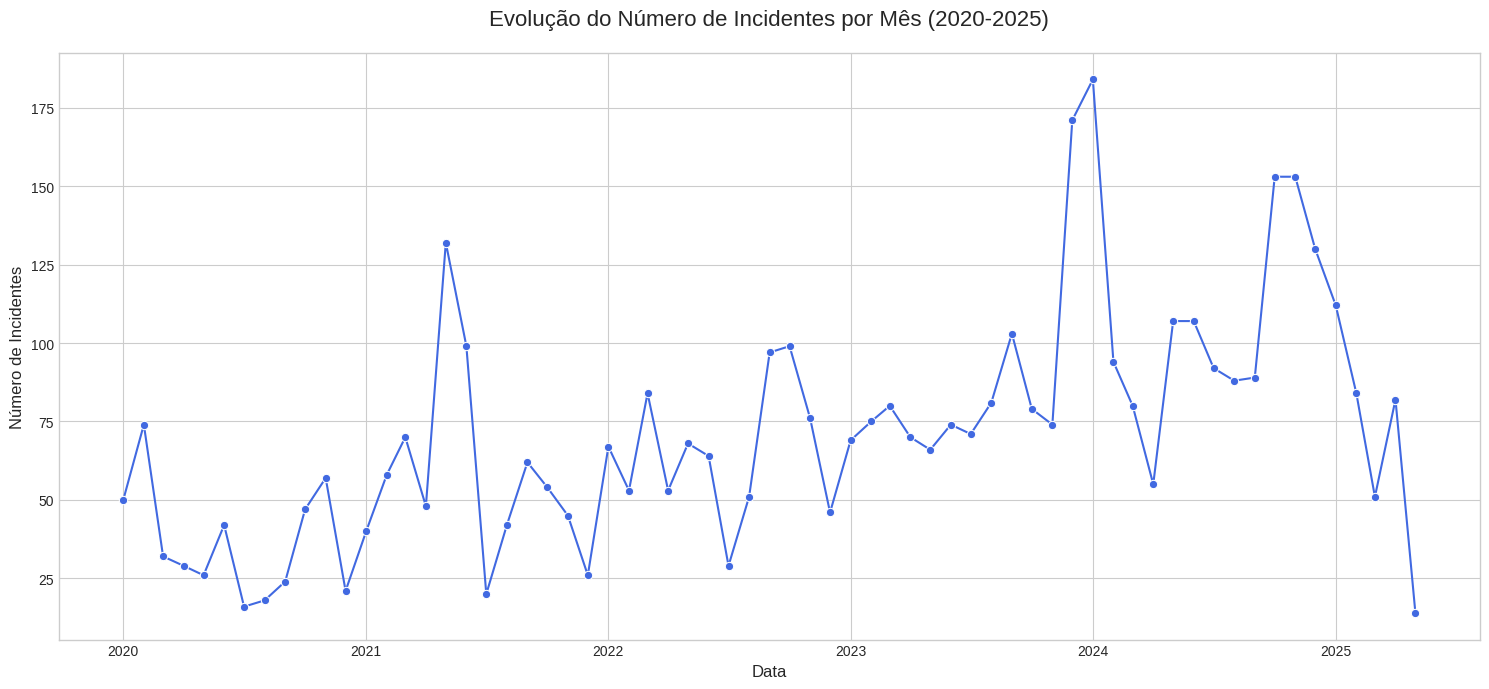

In [22]:
# Agrupar por ano e mês para criar a série temporal
incidents_over_time = df_clean.groupby(['Year', 'Month']).size().reset_index(name='Count')
incidents_over_time['Date'] = pd.to_datetime(incidents_over_time['Year'].astype(str) + '-' + incidents_over_time['Month'].astype(str))

# Plotar a série temporal
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x='Date', y='Count', data=incidents_over_time, marker='o', color='royalblue')

# Adicionar títulos e rótulos
ax.set_title('Evolução do Número de Incidentes por Mês (2020-2025)', fontsize=16, pad=20)
ax.set_xlabel('Data', fontsize=12)
ax.set_ylabel('Número de Incidentes', fontsize=12)

plt.tight_layout()
plt.show()

/tmp/ipython-input-23-157043940.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=incident_counts.values, y=incident_counts.index, palette='magma', orient='h')


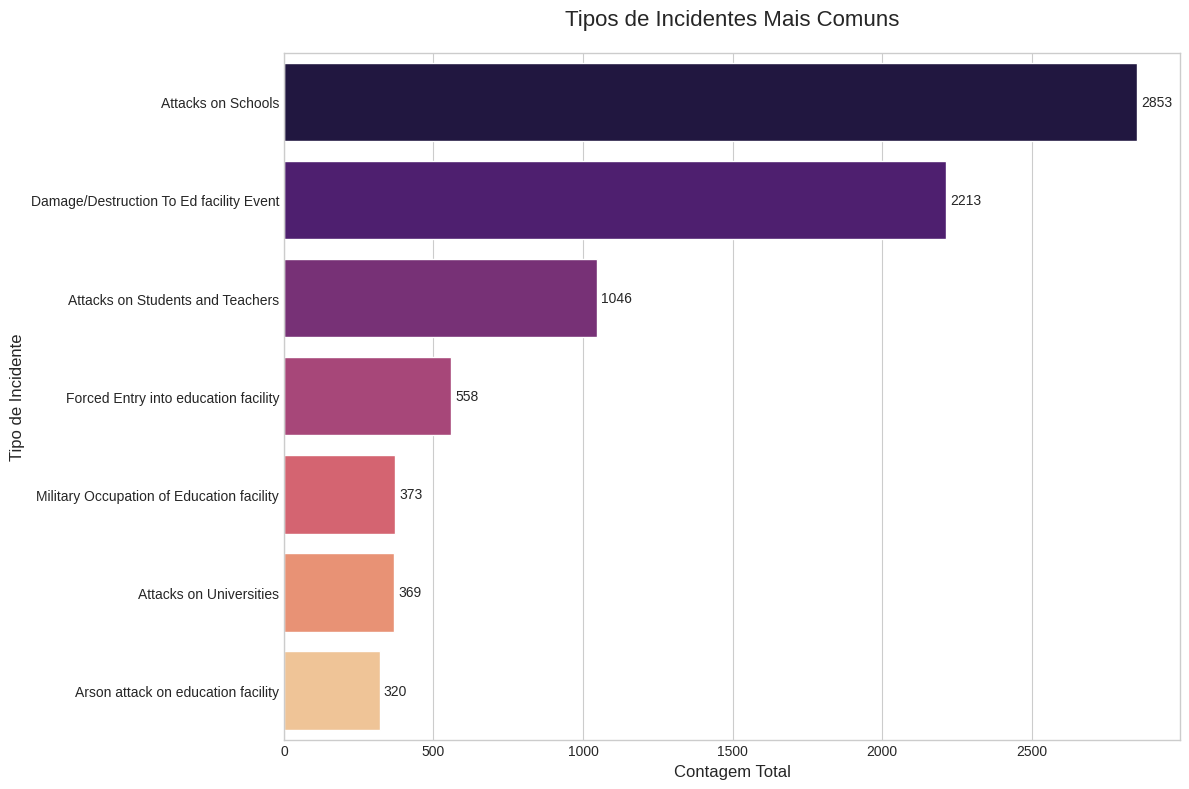

In [23]:
# Selecionar as colunas que representam tipos de incidentes
incident_type_cols = [
    'Attacks on Schools', 'Attacks on Universities',
    'Military Occupation of Education facility',
    'Arson attack on education facility',
    'Forced Entry into education facility',
    'Damage/Destruction To Ed facility Event',
    'Attacks on Students and Teachers'
]

# Somar o total de cada tipo de incidente
incident_counts = df_clean[incident_type_cols].sum().sort_values(ascending=False)

# Plotar os resultados
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=incident_counts.values, y=incident_counts.index, palette='magma', orient='h')

# Adicionar títulos e rótulos
ax.set_title('Tipos de Incidentes Mais Comuns', fontsize=16, pad=20)
ax.set_xlabel('Contagem Total', fontsize=12)
ax.set_ylabel('Tipo de Incidente', fontsize=12)

# Adicionar o número exato em cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()

/tmp/ipython-input-24-3693219726.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=perpetrator_counts.values, y=perpetrator_counts.index, palette='coolwarm', orient='h')


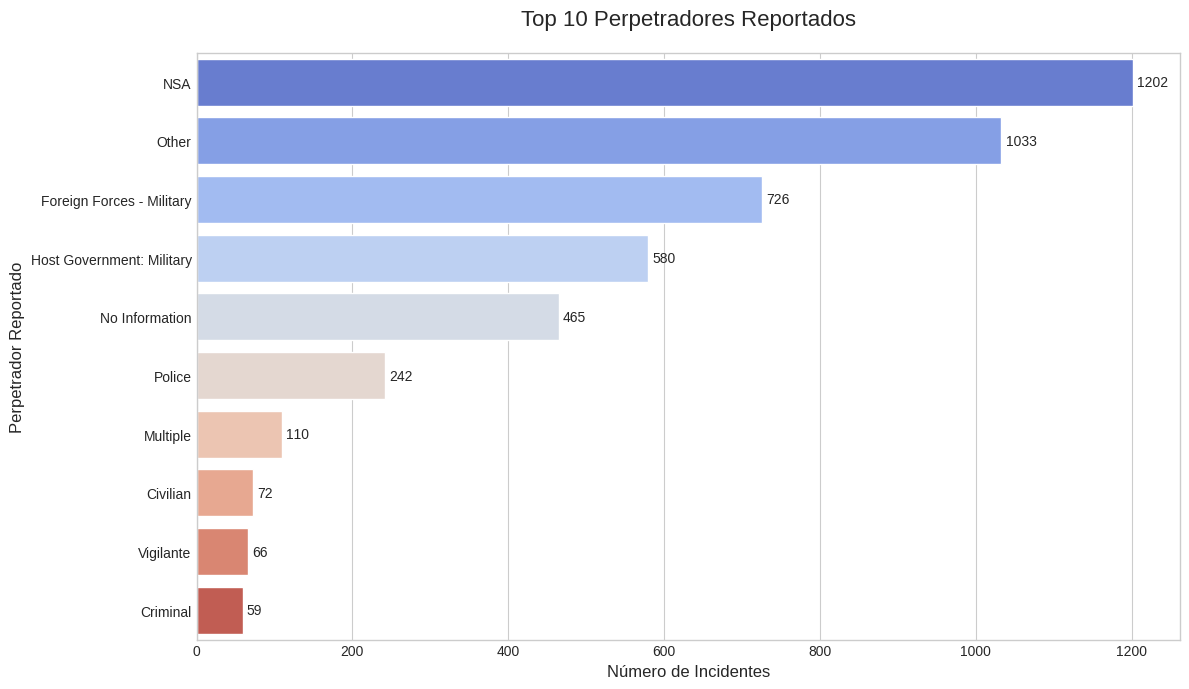

In [24]:
# Contar incidentes por perpetrador
perpetrator_counts = df_clean['Reported Perpetrator'].value_counts().head(10)

# Plotar os resultados
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=perpetrator_counts.values, y=perpetrator_counts.index, palette='coolwarm', orient='h')

# Adicionar títulos e rótulos
ax.set_title('Top 10 Perpetradores Reportados', fontsize=16, pad=20)
ax.set_xlabel('Número de Incidentes', fontsize=12)
ax.set_ylabel('Perpetrador Reportado', fontsize=12)

# Adicionar o número exato em cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()

/tmp/ipython-input-25-1237343137.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=human_cost.index, y=human_cost.values, palette='Reds_r')


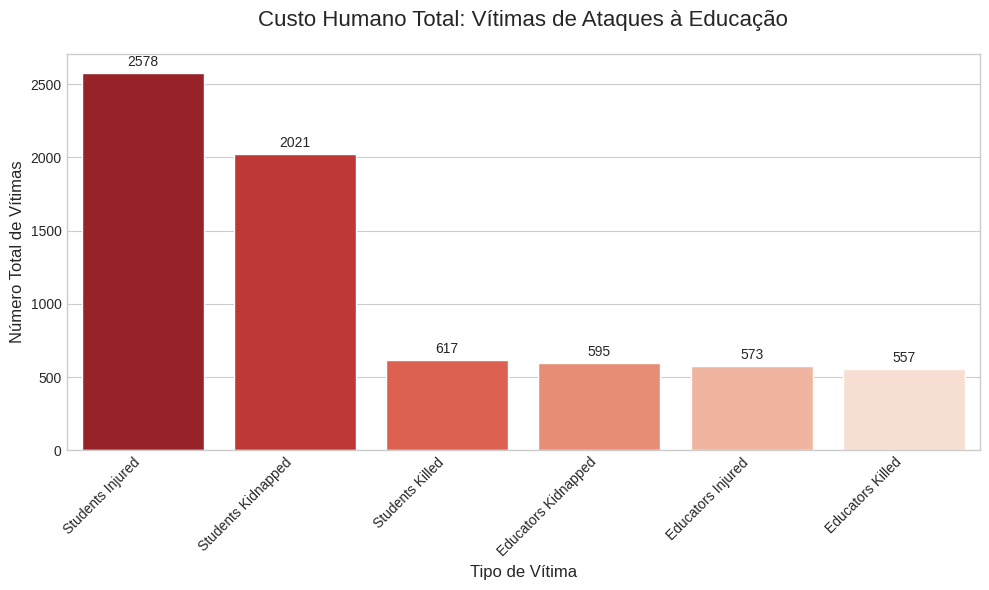

In [25]:
# Somar as vítimas por categoria
human_cost = df_clean[victim_cols].sum().sort_values(ascending=False)

# Plotar os resultados
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=human_cost.index, y=human_cost.values, palette='Reds_r')

# Adicionar títulos e rótulos
ax.set_title('Custo Humano Total: Vítimas de Ataques à Educação', fontsize=16, pad=20)
ax.set_xlabel('Tipo de Vítima', fontsize=12)
ax.set_ylabel('Número Total de Vítimas', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotacionar os rótulos do eixo X para melhor leitura

# Adicionar o número exato em cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()

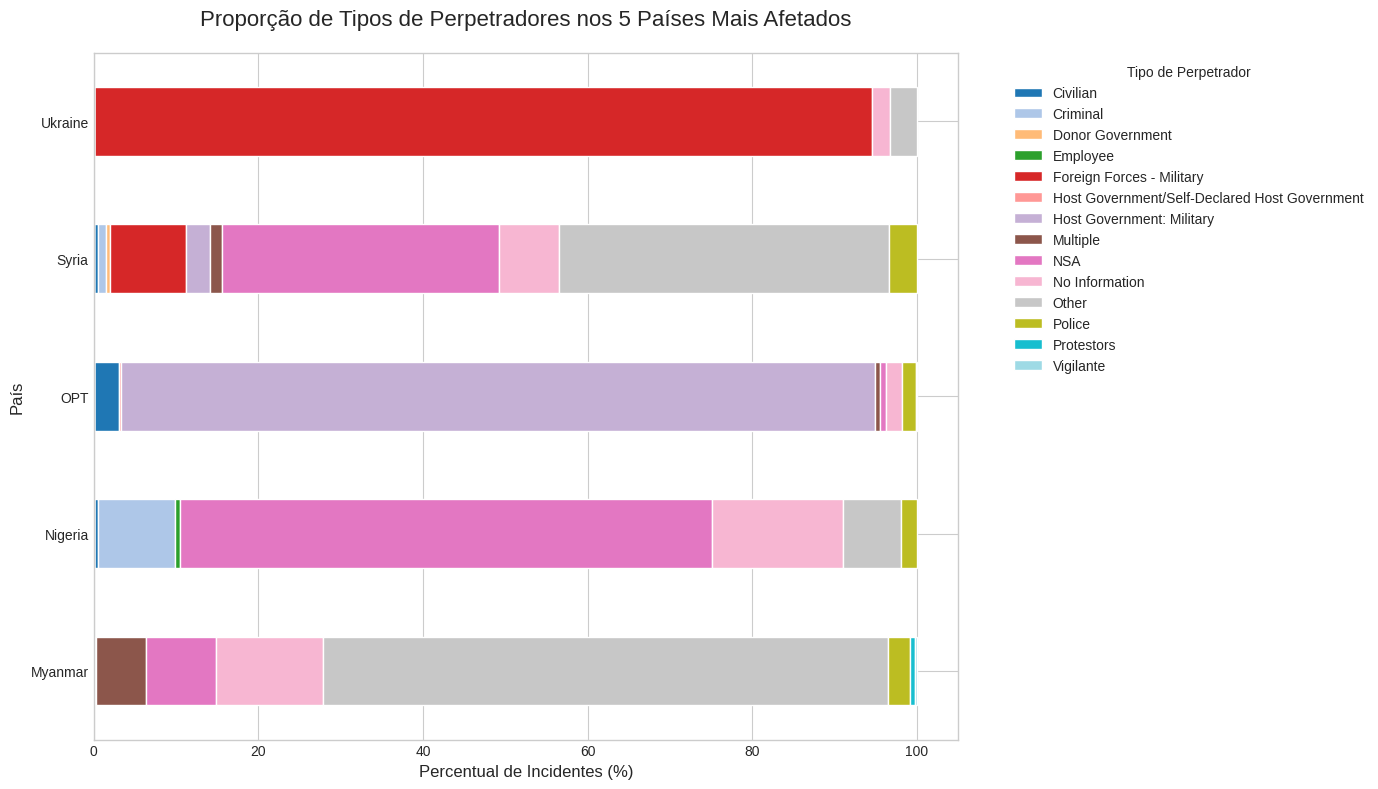

In [26]:
# --- Insight 6: País vs. Tipo de Perpetrador ---

# Filtrar o DataFrame para incluir apenas os 5 países com mais incidentes
top_5_countries_list = df_clean['Country'].value_counts().head(5).index
df_top5 = df_clean[df_clean['Country'].isin(top_5_countries_list)]

# Criar uma tabela de cruzamento (crosstab) entre país e perpetrador
country_perp_crosstab = pd.crosstab(df_top5['Country'], df_top5['Reported Perpetrator'])

# Normalizar os dados por linha para obter a proporção (percentual)
crosstab_norm = country_perp_crosstab.div(country_perp_crosstab.sum(axis=1), axis=0) * 100

# Plotar o gráfico de barras empilhadas
ax = crosstab_norm.plot(
    kind='barh',
    stacked=True,
    figsize=(14, 8),
    colormap='tab20'  # Um mapa de cores com muitas cores distintas
)

# Adicionar títulos e rótulos
ax.set_title('Proporção de Tipos de Perpetradores nos 5 Países Mais Afetados', fontsize=16, pad=20)
ax.set_xlabel('Percentual de Incidentes (%)', fontsize=12)
ax.set_ylabel('País', fontsize=12)
ax.legend(title='Tipo de Perpetrador', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

/tmp/ipython-input-27-1418516831.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Average Victims', y='Incident Type', data=severity_df, palette='Reds_r', orient='h')


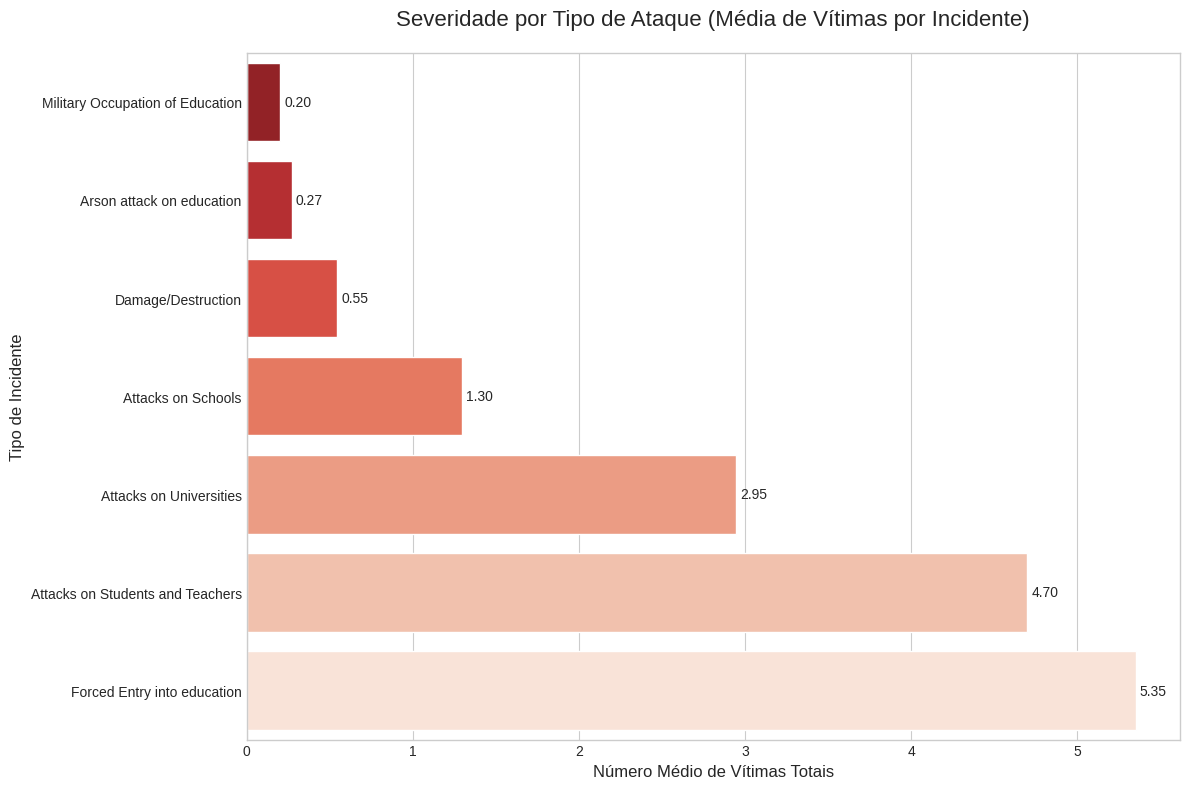

In [27]:
# --- Insight 7: Severidade por Tipo de Ataque ---

# Relembrando as colunas de tipo de incidente
incident_type_cols = [
    'Attacks on Schools', 'Attacks on Universities',
    'Military Occupation of Education facility',
    'Arson attack on education facility',
    'Forced Entry into education facility',
    'Damage/Destruction To Ed facility Event',
    'Attacks on Students and Teachers'
]

# Dicionário para armazenar a média de vítimas por tipo de ataque
severity_by_type = {}

# Calcular a média de vítimas para cada tipo de incidente
for incident_type in incident_type_cols:
    # Filtra o DF para incidentes onde o tipo de ataque ocorreu e calcula a média de vítimas
    avg_victims = df_clean[df_clean[incident_type] > 0]['Total Victims'].mean()
    # Renomear para melhor visualização
    clean_name = incident_type.replace(" facility", "").replace(" To Ed", "").replace(" Event", "")
    severity_by_type[clean_name] = avg_victims

# Criar um DataFrame a partir do dicionário para facilitar a plotagem
severity_df = pd.DataFrame(
    list(severity_by_type.items()),
    columns=['Incident Type', 'Average Victims']
).sort_values('Average Victims', ascending=True)

# Plotar o gráfico
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Average Victims', y='Incident Type', data=severity_df, palette='Reds_r', orient='h')

# Adicionar títulos e rótulos
ax.set_title('Severidade por Tipo de Ataque (Média de Vítimas por Incidente)', fontsize=16, pad=20)
ax.set_xlabel('Número Médio de Vítimas Totais', fontsize=12)
ax.set_ylabel('Tipo de Incidente', fontsize=12)

# Adicionar o número exato em cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

/tmp/ipython-input-28-592287115.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=weapon_counts.values, y=weapon_counts.index, palette='bone_r', orient='h')


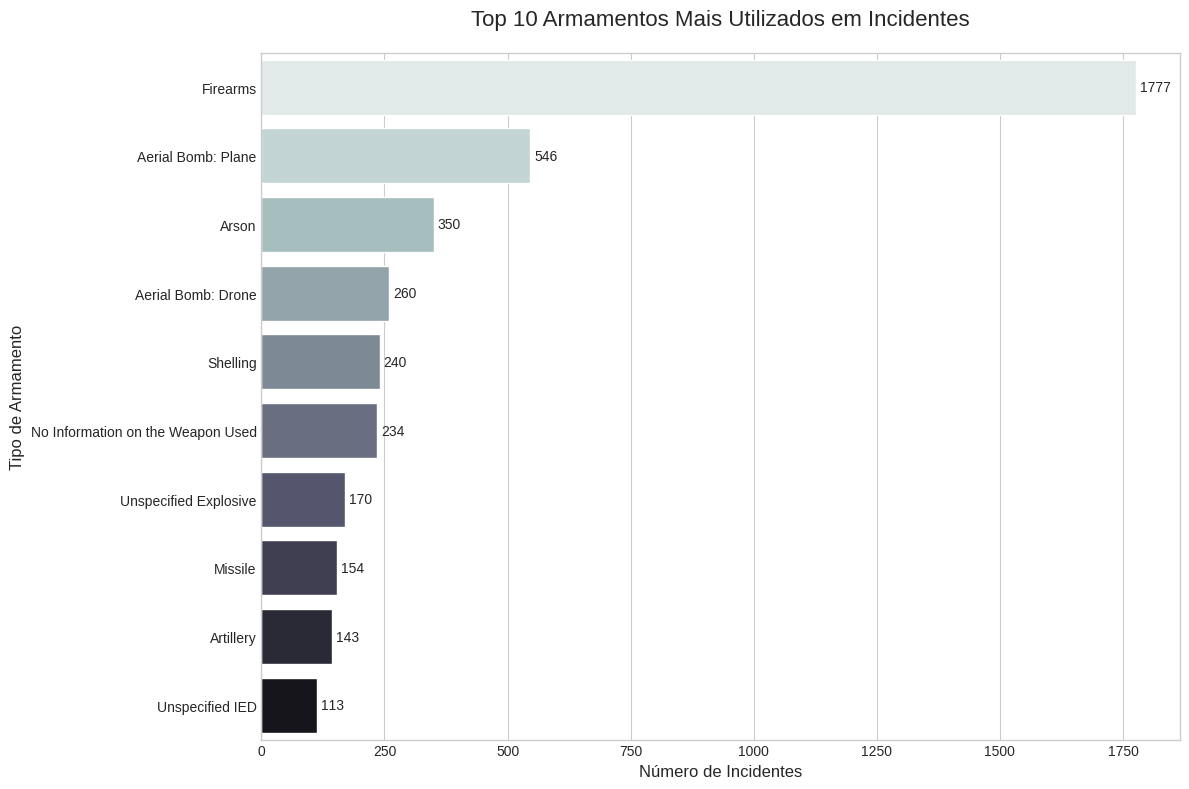

In [28]:
# --- Insight 8: Análise de Armamento Utilizado ---

# Contar o uso de cada tipo de armamento e pegar os 10 mais comuns
# A categoria 'Not Applicable' pode ser grande, vamos mantê-la para contexto
weapon_counts = df_clean['Weapon Carried/Used'].value_counts().head(10)

# Plotar os resultados
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=weapon_counts.values, y=weapon_counts.index, palette='bone_r', orient='h')

# Adicionar títulos e rótulos
ax.set_title('Top 10 Armamentos Mais Utilizados em Incidentes', fontsize=16, pad=20)
ax.set_xlabel('Número de Incidentes', fontsize=12)
ax.set_ylabel('Tipo de Armamento', fontsize=12)

# Adicionar o número exato em cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()

In [29]:
# Filtrar o DataFrame para conter apenas dados do Brasil
df_brasil = df_clean[df_clean['Country'] == 'Brazil']

# Verificar o número de incidentes registrados
num_incidentes_brasil = len(df_brasil)

print(f"Número de incidentes registrados para o Brasil no dataset: {num_incidentes_brasil}")

if not df_brasil.empty:
    print("\n--- Detalhes dos Incidentes no Brasil ---")
    print(df_brasil)
else:
    print("Não há dados de incidentes para o Brasil neste conjunto de dados.")

Número de incidentes registrados para o Brasil no dataset: 5

--- Detalhes dos Incidentes no Brasil ---
           Date Country Country ISO               Admin 1  Latitude  \
3938 2021-05-04  Brazil         BRA  Santa Catarina state     -26.9   
3973 2021-04-23  Brazil         BRA             São Paulo     -23.5   
4020 2021-03-15  Brazil         BRA          North Region      -1.4   
4035 2021-03-10  Brazil         BRA          North Region      -1.4   
4387 2020-06-09  Brazil         BRA        Rio de Janeiro     -22.9   

      Longitude                              Geo Precision  \
3938      -53.0  (3) District, Communicipality or Commune    
3973      -46.6  (3) District, Communicipality or Commune    
4020      -48.4  (3) District, Communicipality or Commune    
4035      -48.4  (3) District, Communicipality or Commune    
4387      -43.2          (4) Province, State, Governorate    

        Location of event Reported Perpetrator Reported Perpetrator Name  ...  \
3938  Education

/tmp/ipython-input-30-1638386077.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=contagem_america_sul.index, y=contagem_america_sul.values, palette='plasma')


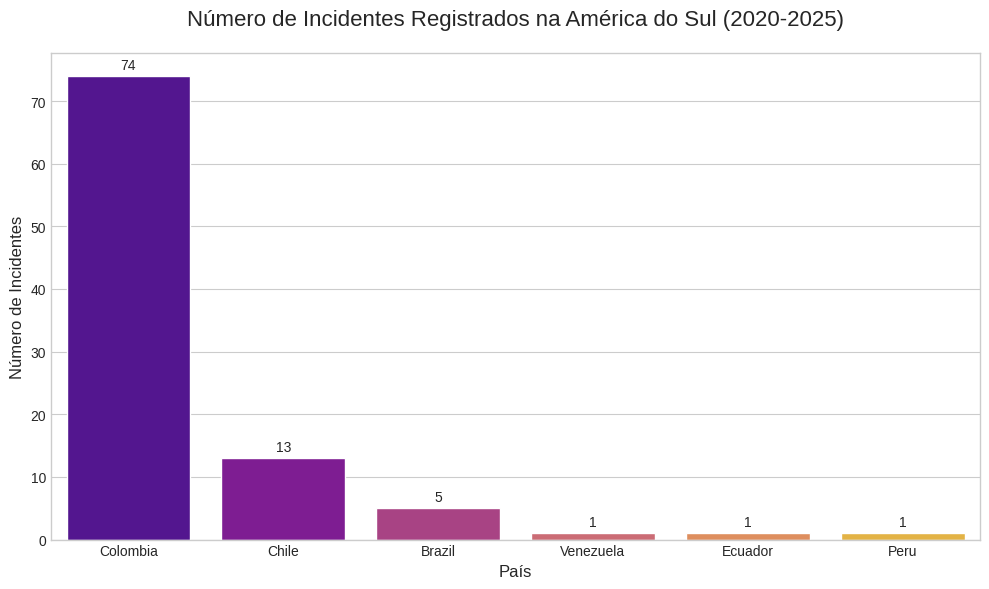

In [30]:
# Lista de países da América do Sul
paises_sul_americanos = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
]

# Filtrar o dataset original para esses países
df_america_sul = df_clean[df_clean['Country'].isin(paises_sul_americanos)]

# Contar os incidentes por país
contagem_america_sul = df_america_sul['Country'].value_counts()

# Plotar o gráfico para os países com incidentes
if not contagem_america_sul.empty:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=contagem_america_sul.index, y=contagem_america_sul.values, palette='plasma')

    # Adicionar títulos e rótulos
    ax.set_title('Número de Incidentes Registrados na América do Sul (2020-2025)', fontsize=16, pad=20)
    ax.set_xlabel('País', fontsize=12)
    ax.set_ylabel('Número de Incidentes', fontsize=12)

    # Adicionar o número exato em cada barra
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=3)

    plt.tight_layout()
    plt.show()
else:
    print("Não há incidentes registrados para nenhum país da América do Sul neste dataset.")